In [1]:
# Sean Dougherty
# 03/15/2022
# this file reads in the output csv filed from agn_merger.py and does some preliminary visualization
# will later become a .py file for sharing and convinience

In [ ]:
# at the end of csv processing, we want a df with bins as columns and iterations as rows
# we want 3 of these: for pair AGN fraction, iso AGN fraction, and enhancement

In [4]:
# load libraries
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
from numpy import random
import matplotlib.pyplot as plt

import os

from time import sleep
from tqdm import tqdm

data_path = '/nobackup/c1029594/CANDELS_AGN_merger_data/agn_merger_output/'

## Checking pair and control galaxy mass and redshift distributions

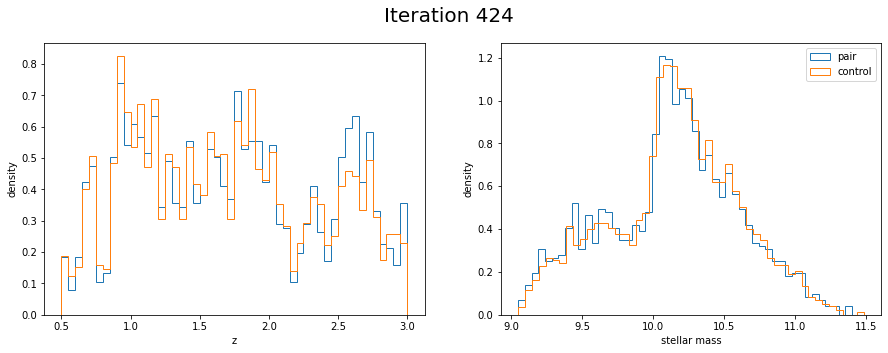

1.71 1.65


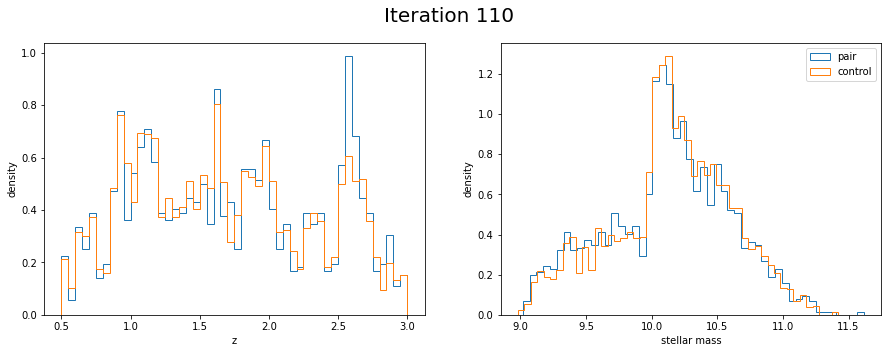

1.69 1.63


In [9]:
# do I want to do this by bin? or per iteration?
# probably best to just randomly choose 2 or 3 iterations to look at this for

#photo-specz_results/photo-specz_'

# generate a 2 random integers to look at distributions
idx = random.randint(len(os.listdir(data_path+'photoz_results/')), size=2)

# photo-specz_5.csv

# open each dataframe and plot distributions
for file_idx in idx:
    ran_df = pd.read_csv( data_path+'photoz_results/'+(os.listdir(data_path+'photoz_results/'))[file_idx] )
    ran_df = ran_df[ (ran_df['prime_drawn_M'] > 10) ]#& (ran_df['field'] != 'GDS') ]
    
    # create arrays for distributions
    histp_z = np.concatenate( (np.array(ran_df['prime_drawn_z']), np.array(ran_df['partner_drawn_z'])), axis=0 )
    histp_M = np.concatenate( (np.array(ran_df['prime_drawn_M']), np.array(ran_df['partner_drawn_M'])), axis=0 )
    
    histc_z = np.concatenate( (np.array(ran_df['prime_control1_drawn_z']), np.array(ran_df['prime_control2_drawn_z']),
                               np.array(ran_df['partner_control1_drawn_z']), np.array(ran_df['partner_control2_drawn_z'])), axis=0 )
    histc_M = np.concatenate( (np.array(ran_df['prime_control1_drawn_M']), np.array(ran_df['prime_control2_drawn_M']),
                               np.array(ran_df['partner_control1_drawn_M']), np.array(ran_df['partner_control2_drawn_M'])), axis=0 )
    
    # make subplots to show mass and z distributions for pair and control galaxies
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    axs[0].hist(histp_z, bins=50, density=True, histtype='step')
    axs[0].hist(histc_z, bins=50, density=True, histtype='step')
    axs[0].set_xlabel('z')
    axs[0].set_ylabel('density')
    #axs[0].title['redshift']
    
    axs[1].hist(histp_M, bins=50, density=True, histtype='step', label='pair')
    axs[1].hist(histc_M, bins=50, density=True, histtype='step', label='control')
    axs[1].legend()
    axs[1].set_xlabel('stellar mass')
    axs[1].set_ylabel('density')
    
    fig.suptitle('Iteration {}'.format(file_idx), fontsize=20)
    
    #axs[1].title('iteration '+str(file_idx))
    plt.show()
    
    print( np.median(histp_z), np.nanmedian(histc_z) )

In [12]:
ran_df

,Unnamed: 0,prime_index,partner_index,arc_sep,mass_ratio,dv,kpc_sep,prime_drawn_z,prime_drawn_M,prime_drawn_LX,partner_drawn_z,partner_drawn_M,partner_drawn_LX,prime_control1_ID,prime_control1_drawn_z,prime_control1_drawn_M,prime_control1_drawn_LX,prime_control2_ID,prime_control2_drawn_z,prime_control2_drawn_M,prime_control2_drawn_LX,partner_control1_ID,partner_control1_drawn_z,partner_control1_drawn_M,partner_control1_drawn_LX,partner_control2_ID,partner_control2_drawn_z,partner_control2_drawn_M,partner_control2_drawn_LX,field,prime_cat_ID,partner_cat_ID,prime_control1_cat_ID,prime_control2_cat_ID,partner_control1_cat_ID,partner_control2_cat_ID
0,371,26,33,8.168008,0.890000,855.820415,66.863729,1.11,10.130000,-99.0,1.10,9.240000,-99.0,2008.0,1.12,10.120000,-99.000,11446.0,1.13,10.140000,-99.0,5187.0,1.07,9.250000,-99.0000,11445.0,1.08,9.270000,-99.0,GDS,40,50,2840.0,17245.0,7649.0,17244.0
1,898,54,40,6.933610,0.510000,-828.742772,56.942380,1.13,10.430000,-99.0,1.14,9.920000,-99.0,9677.0,1.14,10.420000,41.506,16135.0,1.14,10.450000,-99.0,7750.0,1.14,9.940000,-99.0000,2330.0,1.12,9.910000,-99.0,GDS,76,58,14520.0,24427.0,11516.0,3295.0
21,4979,222,209,8.312244,0.270000,863.964871,68.295366,2.28,10.020000,-99.0,2.25,9.750000,-99.0,15019.0,2.26,9.990000,-99.000,12656.0,2.26,10.050000,-99.0,15238.0,2.25,9.720000,-99.0000,9702.0,2.28,9.730000,-99.0,GDS,287,271,22797.0,19135.0,23119.0,14566.0
31,6723,283,239,4.051994,0.970000,-337.317150,33.776159,2.07,10.320000,-99.0,2.08,9.350000,-99.0,3991.0,2.07,10.330000,-99.000,11774.0,2.07,10.290000,-99.0,2684.0,2.07,9.370000,-99.0000,15386.0,2.08,9.320000,-99.0,GDS,366,312,5792.0,17744.0,3791.0,23341.0
73,16047,656,605,10.676728,0.570000,657.134823,85.181552,2.63,10.180000,-99.0,2.60,9.610000,-99.0,5540.0,2.63,10.180000,-99.000,6144.0,2.64,10.160000,-99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GDS,887,822,8177.0,9098.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10111,657064,19187,19142,3.331600,0.289502,943.690558,26.801883,1.02,10.931966,-99.0,1.01,10.642465,-99.0,14609.0,1.03,10.902547,43.469,17252.0,1.05,10.952792,-99.0,11660.0,1.00,10.669317,42.8141,13295.0,1.05,10.660865,-99.0,UDS,26717,26665,20239.0,23956.0,16165.0,18388.0
10115,659556,19259,18915,9.375980,0.525239,-535.465505,79.410503,1.56,10.089905,-99.0,1.57,9.564666,-99.0,12148.0,1.57,10.093422,-99.000,16929.0,1.54,10.089905,-99.0,1750.0,1.56,9.571709,-99.0000,15180.0,1.55,9.557507,-99.0,UDS,26809,26344,16821.0,23475.0,2597.0,21038.0
10124,664175,19400,19096,8.550867,0.712981,338.939369,65.985838,2.98,10.100371,-99.0,2.96,9.387390,-99.0,4331.0,2.99,10.117271,-99.000,8769.0,2.97,10.120574,-99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UDS,26997,26595,6159.0,12181.0,NaN,NaN
10139,666532,19465,16825,2.800840,0.917091,-447.740425,23.682281,1.75,10.462398,-99.0,1.76,9.545307,-99.0,18656.0,1.76,10.442480,-99.000,250.0,1.76,10.428135,-99.0,16577.0,1.79,9.550228,-99.0000,1132.0,1.75,9.514548,-99.0,UDS,27088,23324,25980.0,410.0,22991.0,1710.0


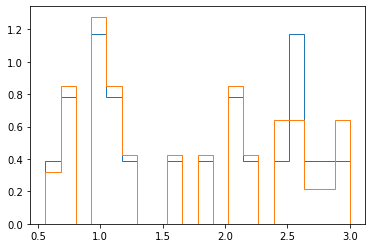

In [136]:
# test_df = pd.read_csv('/nobackup/c1029594/CANDELS_AGN_merger_data/agn_merger_output/photoz_TEST.csv')
ran_df = ran_df[ ran_df['kpc_sep'] < 20 ]
pairz = np.concatenate( (np.array(ran_df['prime_drawn_z']), np.array(ran_df['partner_drawn_z'])), axis=0 )
isoz =  np.concatenate( (np.array(ran_df['prime_control1_drawn_z']), np.array(ran_df['prime_control2_drawn_z']),
                       np.array(ran_df['partner_control1_drawn_z']), np.array(ran_df['partner_control2_drawn_z'])), axis=0 )
pairm = np.concatenate( (np.array(ran_df['prime_drawn_M']), np.array(ran_df['partner_drawn_M'])), axis=0 )
isom =  np.concatenate( (np.array(ran_df['prime_control1_drawn_M']), np.array(ran_df['prime_control2_drawn_M']),
                       np.array(ran_df['partner_control1_drawn_M']), np.array(ran_df['partner_control2_drawn_M'])), axis=0 )
x, bins, patches = plt.hist(pairz, bins=20, density=True, histtype='step')
plt.hist(isoz, bins=bins, density=True, histtype='step')
plt.show()

In [ ]:
ran_df2 = ran_df[ (ran_df['prime_drawn_LX'] > 42) ]
ran_df3 = ran_df[ (ran_df['partner_drawn_LX'] > 42) ]

ran_df4 = ran_df[ (ran_df['prime_control1_drawn_LX'] > 42) ]
ran_df5 = ran_df[ (ran_df['prime_control2_drawn_LX'] > 42) ]
ran_df6 = ran_df[ (ran_df['partner_control1_drawn_LX'] > 42) ]
ran_df7 = ran_df[ (ran_df['partner_control2_drawn_LX'] > 42) ]

# print(ran_df2['prime_index'])
# print(ran_df3['partner_index'])
# print(ran_df4['prime_control1_ID'])
# print(ran_df5['prime_control2_ID'])
# print(ran_df6['partner_control1_ID'])
# print(ran_df7['partner_control2_ID'])


## Galaxy property checks

In [18]:
# For a random single iteration, plot the distribution of mass in each bin

# generate a 2 random integers to look at distributions
idx = random.randint(len(os.listdir(data_path+'photo-specz_results/')), size=2)

# generate bins
max_dist = 100
n_bins = 8
bins, bin_all_pairfrac, bin_all_isofrac = make_bins(max_dist=max_dist, n_bins=n_bins)

# create dictionaries to store redshift and mass distributions
bin_AGN = {}
bin_pairfrac_mass = {}
bin_isofrac_mass = {}
bin_pairfrac_z = {}
bin_isofrac_z = {}

bin_pid = {}
bin_cid = {}
print(file)
it_df = pd.read_csv(data_path+'photo-specz_results/'+file)
it_df = it_df[ (it_df['field'] != 'GDS') & (it_df['prime_drawn_M'] > 9.5)  ]
    
# separate pairs into bins
for rnge in bins:
    # get bin ranges from bins dictionary entries
    info = bins[rnge].split('-')
    low = float(info[0])
    high = float(info[1])

    # sort into bins
    bin_df = it_df[ (it_df['kpc_sep'] > low) & (it_df['kpc_sep'] <= high) ]

    # print(len(bin_df[ (bin_df['prime_drawn_LX'] > 42) ]) , bin_df['prime_drawn_LX'].count())
    # print(len(bin_df[ (bin_df['partner_drawn_LX'] > 42) ]) , bin_df['partner_drawn_LX'].count())
    # print('-----')
    # print(len(bin_df[ (bin_df['prime_control1_drawn_LX'] > 42) ]), bin_df['prime_control1_drawn_LX'].count())
    # print(len(bin_df[ (bin_df['prime_control2_drawn_LX'] > 42) ]), bin_df['prime_control2_drawn_LX'].count())
    # print(len(bin_df[ (bin_df['partner_control1_drawn_LX'] > 42) ]), bin_df['partner_control1_drawn_LX'].count())
    # print(len(bin_df[ (bin_df['partner_control2_drawn_LX'] > 42) ]), bin_df['partner_control2_drawn_LX'].count())
    # print('----------------------')
    
    # get pair distributions for mass and redshift in each bin
    bin_pairfrac_mass['pair_mass_in_'+rnge] = np.concatenate( (np.array(bin_df.loc[:, 'prime_drawn_M']), 
                                                               np.array(bin_df.loc[:, 'partner_drawn_M'])), axis=0 )
    bin_pairfrac_z['pair_z_in_'+rnge] = np.concatenate( (np.array(bin_df.loc[:, 'prime_drawn_z']), 
                                                               np.array(bin_df.loc[:, 'partner_drawn_z'])), axis=0 )
    bin_isofrac_mass['iso_mass_in_'+rnge] = np.concatenate( (np.array(bin_df.loc[:, 'prime_control1_drawn_M']), 
                                                               np.array(bin_df.loc[:, 'prime_control2_drawn_M']),
                                                           np.array(bin_df.loc[:, 'partner_control1_drawn_M']),
                                                           np.array(bin_df.loc[:, 'partner_control2_drawn_M'])), axis=0 )
    bin_isofrac_z['iso_z_in_'+rnge] = np.concatenate( (np.array(bin_df.loc[:, 'prime_control1_drawn_z']), 
                                                               np.array(bin_df.loc[:, 'prime_control2_drawn_z']),
                                                           np.array(bin_df.loc[:, 'partner_control1_drawn_z']),
                                                           np.array(bin_df.loc[:, 'partner_control2_drawn_z'])), axis=0 )
    print(rnge)
    bin_pid['pid_'+rnge] = np.concatenate( (np.array(bin_df.loc[:, 'prime_index']), 
                                                               np.array(bin_df.loc[:, 'partner_index'])), axis=0 )
    bin_cid['cid_'+rnge] = np.concatenate( (np.array(bin_df.loc[:, 'prime_control1_ID']), 
                                                               np.array(bin_df.loc[:, 'prime_control2_ID']),
                                                           np.array(bin_df.loc[:, 'partner_control1_ID']),
                                                           np.array(bin_df.loc[:, 'partner_control2_ID'])), axis=0 )


ValueError: too many values to unpack (expected 3)

In [17]:
len(bin_df['partner_control1_ID'])

105

In [195]:
aa = np.array(bin_df.loc[bin_df['field'] == 'GDS', 'prime_index'])
print(aa)

[   36  1270  1316  1342  1357  1542  1670  1802  2253  2393  2420  2712
  3305  4357  4386  4916  5023  5891  5914  6364  6431  6514  6876  6902
  7030  7097  7155  7264  7343  7511  7730  7919  8138  8190  9840 10269
 10615 10718 10923 11073 11116 11343 12085 13479 13858 14076 14107 14629
 14854 14927 15123 15139 15422 15552 15811 15911 15943 16212 16222 16851
 16894 16951 17207 17286 17380 17426 17466 17574 18964]


In [196]:
bb = np.array(bin_df.loc[bin_df['field'] == 'GDS', 'prime_control1_ID'])

cc = np.array(bin_df.loc[bin_df['field'] == 'GDS', 'partner_control1_ID'])

In [197]:
# check for duplicate indices
for idx in aa:
    if idx in bb or idx in cc:
        print('oops')

In [198]:
pmass = [ (bin_pairfrac_mass[col]) for col in bin_pairfrac_mass]
pz = [ (bin_pairfrac_z[col]) for col in bin_pairfrac_z]
imass = [ (bin_isofrac_mass[col])[~np.isnan(bin_isofrac_mass[col])] for col in bin_isofrac_mass]
iz = [ (bin_isofrac_z[col])[~np.isnan(bin_isofrac_z[col])] for col in bin_isofrac_z]

# make position vector
kpc_meds = [ ( ( float((bins[key].split('-'))[0]) + float((bins[key].split('-'))[1]) ) / 2 ) for key in bins ]

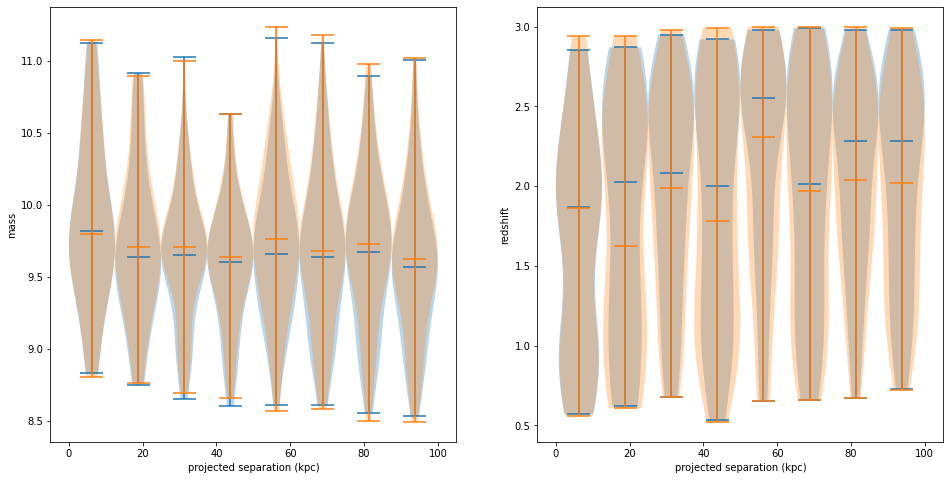

In [199]:
# make violin plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
axs[0].violinplot(pmass, kpc_meds, points=100, widths=vwidth, showmeans=False,
                     showextrema=True, showmedians=True, bw_method=0.5)
axs[0].violinplot(imass, kpc_meds, points=100, widths=vwidth, showmeans=False,
                     showextrema=True, showmedians=True, bw_method=0.5)
# axs[0].set_title('Results', fontsize=20)
axs[0].axis(xmin=-5,xmax=105)
axs[0].set_xlabel('projected separation (kpc)')
axs[0].set_ylabel('mass')

axs[1].violinplot(pz, kpc_meds, points=100, widths=vwidth, showmeans=False,
                     showextrema=True, showmedians=True, bw_method=0.5)
axs[1].violinplot(iz, kpc_meds, points=100, widths=vwidth, showmeans=False,
                     showextrema=True, showmedians=True, bw_method=0.5)
axs[1].axis(xmin=-5,xmax=105)
axs[1].set_xlabel('projected separation (kpc)')
axs[1].set_ylabel('redshift')

plt.show()


## Calculate AGN fractions

In [4]:
# create bins
max_dist = 100
n_bins = 8
bins, bin_all_pairfrac, bin_all_isofrac, bin_AGN_count, bin_gal_count = make_bins(max_dist=max_dist, n_bins=n_bins)

# define X-ray luminosity AGN limit
LX_AGN = 42

# create dictionaries to store AGN fractions
bin_AGN = {}
bin_pairfrac = {}
bin_isofrac = {}

# read through all the iteration files
for file in tqdm(os.listdir(data_path+'photo-specz_results/')):
    it_df = pd.read_csv(data_path+'photo-specz_results/'+file)
    it_df = it_df[ (it_df['prime_drawn_M'] > 10) & (it_df['prime_drawn_z'] < 2.5) ]# & (it_df['field'] == 'GDS') ]# &
                # (it_df['mass_ratio'] > 0.25)]
        
    # separate pairs into bins
    for rnge in bins:
        # get bin ranges from bins dictionary entries
        info = bins[rnge].split('-')
        low = float(info[0])
        high = float(info[1])
        
        # sort into bins
        bin_df = it_df[ (it_df['kpc_sep'] > low) & (it_df['kpc_sep'] <= high) ]
        
        # print(len(bin_df[ (bin_df['prime_drawn_LX'] > LX_AGN) ]) , bin_df['prime_drawn_LX'].count())
        # print(len(bin_df[ (bin_df['partner_drawn_LX'] > LX_AGN) ]) , bin_df['partner_drawn_LX'].count())
        # print('-----')
        # print(len(bin_df[ (bin_df['prime_control1_drawn_LX'] > LX_AGN) ]), bin_df['prime_control1_drawn_LX'].count())
        # print(len(bin_df[ (bin_df['prime_control2_drawn_LX'] > LX_AGN) ]), bin_df['prime_control2_drawn_LX'].count())
        # print(len(bin_df[ (bin_df['partner_control1_drawn_LX'] > LX_AGN) ]), bin_df['partner_control1_drawn_LX'].count())
        # print(len(bin_df[ (bin_df['partner_control2_drawn_LX'] > LX_AGN) ]), bin_df['partner_control2_drawn_LX'].count())
        # print('----------------------')
        
        
        # print(np.array(bin_df.loc[ (bin_df['prime_drawn_LX'] > LX_AGN), 'prime_cat_ID' ]))
        # print(np.array(bin_df.loc[ (bin_df['partner_drawn_LX'] > LX_AGN), 'partner_cat_ID']) )
        # print('-----')
        # print(np.array(bin_df.loc[ (bin_df['prime_control1_drawn_LX'] > LX_AGN), 'prime_control1_cat_ID' ]))
        # print(np.array(bin_df.loc[ (bin_df['prime_control2_drawn_LX'] > LX_AGN), 'prime_control2_cat_ID' ]))
        # print(np.array(bin_df.loc[ (bin_df['partner_control1_drawn_LX'] > LX_AGN), 'partner_control1_cat_ID' ]))
        # print(np.array(bin_df.loc[ (bin_df['partner_control2_drawn_LX'] > LX_AGN), 'partner_control2_cat_ID' ]))
        # print('----------------------')
        
        
        # calculate the AGN fraction in that bin and append it to same calculation accross iteration
        bin_pairfrac[bins[rnge]] = ((  len(bin_df[ (bin_df['prime_drawn_LX'] > LX_AGN) ]) +
                                             len(bin_df[ (bin_df['partner_drawn_LX'] > LX_AGN) ])
                                            ) /
                                            (  bin_df['prime_drawn_LX'].count() +
                                             bin_df['partner_drawn_LX'].count()
                                            ))
        bin_all_pairfrac[bins[rnge]].append(bin_pairfrac[bins[rnge]])

        
        bin_isofrac[bins[rnge]] = ((  len(bin_df[ (bin_df['prime_control1_drawn_LX'] > LX_AGN) ] ) +
                                            len(bin_df[ (bin_df['prime_control2_drawn_LX'] > LX_AGN) ]) +
                                            len(bin_df[ (bin_df['partner_control1_drawn_LX'] > LX_AGN) ]) +
                                            len(bin_df[ (bin_df['partner_control2_drawn_LX'] > LX_AGN) ]) 
                                           ) /
                                            (  bin_df['prime_control1_drawn_LX'].count() +
                                             bin_df['prime_control2_drawn_LX'].count() +
                                             bin_df['partner_control1_drawn_LX'].count() +
                                             bin_df['partner_control2_drawn_LX'].count() ))
        bin_all_isofrac[bins[rnge]].append(bin_isofrac[bins[rnge]])
        
        # store simple counts
        bin_AGN_count[bins[rnge]].append(len(bin_df[ (bin_df['prime_drawn_LX'] > LX_AGN) ]) +
                                             len(bin_df[ (bin_df['partner_drawn_LX'] > LX_AGN) ]))
        
        bin_gal_count[bins[rnge]].append(bin_df['prime_drawn_LX'].count() +
                                             bin_df['partner_drawn_LX'].count())

100%|██████████| 500/500 [00:31<00:00, 15.78it/s]


In [3]:
def make_bins(max_dist=100, n_bins=10):

    bin_all_AGNfrac = {}
    bin_all_isofrac = {}
    
    # create dictionaries to store AGN and pair galaxy counts -> just for paried galaxies (controls later)
    bin_AGN_count = {}
    bin_gal_count = {}

    # create bin sizes
    all_bins = {}
    for bn in range(0, n_bins):
        # define limits for each bin
        all_bins[str(bn)] = str((max_dist/n_bins)*bn)+'-'+str((max_dist/n_bins)+(max_dist/n_bins)*bn)
        # define empty lists to later append AGN fractions to
        bin_all_AGNfrac[all_bins[str(bn)]] = []
        bin_all_isofrac[all_bins[str(bn)]] = []
        bin_AGN_count[all_bins[str(bn)]] = []
        bin_gal_count[all_bins[str(bn)]] = []
        
    
    return all_bins, bin_all_AGNfrac, bin_all_isofrac, bin_AGN_count, bin_gal_count

In [94]:
# create dataframes from the dictionaries:
pAGNf_df = pd.DataFrame.from_dict(bin_all_pairfrac)
iAGNf_df = pd.DataFrame.from_dict(bin_all_isofrac)

In [95]:
pAGNf_df.describe()

,0.0-12.5,12.5-25.0,25.0-37.5,37.5-50.0,50.0-62.5,62.5-75.0,75.0-87.5,87.5-100.0
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.064370,0.066742,0.044887,0.042151,0.049275,0.033221,0.049232,0.031691
std,0.024246,0.016304,0.013846,0.015692,0.015554,0.011940,0.013914,0.011107
min,0.016129,0.020270,0.012500,0.000000,0.006579,0.000000,0.015306,0.004274
25%,0.046875,0.055556,0.034843,0.031646,0.038782,0.025000,0.040404,0.024038
50%,0.062500,0.065574,0.043344,0.041096,0.048913,0.032609,0.048728,0.030838
75%,0.080645,0.076271,0.052941,0.051948,0.059783,0.041192,0.057292,0.038462
max,0.181818,0.125000,0.106667,0.088235,0.106742,0.066667,0.097826,0.062500


In [96]:
iAGNf_df.describe()

,0.0-12.5,12.5-25.0,25.0-37.5,37.5-50.0,50.0-62.5,62.5-75.0,75.0-87.5,87.5-100.0
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.048943,0.045295,0.046823,0.042624,0.045877,0.044292,0.042010,0.036684
std,0.020811,0.011113,0.011965,0.011721,0.011004,0.010688,0.009837,0.008333
min,0.000000,0.013393,0.014388,0.010101,0.020710,0.007160,0.015789,0.012987
25%,0.034483,0.038095,0.038346,0.034679,0.038150,0.037221,0.034987,0.031088
50%,0.048038,0.045139,0.046470,0.041477,0.045181,0.044181,0.041667,0.036199
75%,0.061224,0.052216,0.055556,0.050204,0.052632,0.051414,0.049440,0.041969
max,0.129032,0.095041,0.083333,0.082645,0.086207,0.086538,0.067308,0.062954


In [97]:
### photo ###
#0.030469	0.017197	0.014310	0.017071	0.017050	0.012333	0.014314	0.011376
#0.030444	0.016769	0.014832	0.017431	0.018136	0.011767	0.014715	0.011397
### photo+spec ###
#0.024890	0.015904	0.012903	0.014925	0.016148	0.011903	0.013837	0.010741
#0.023732	0.014565	0.013229	0.016505	0.016001	0.011962	0.014264	0.010781

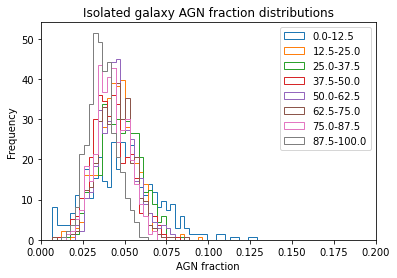

In [115]:
# plot distributions
iAGNf_df.plot.hist(bins=45, histtype='step', density=True)

plt.title('Isolated galaxy AGN fraction distributions')
plt.xlabel('AGN fraction')
plt.xlim(0, 0.2)
plt.show()

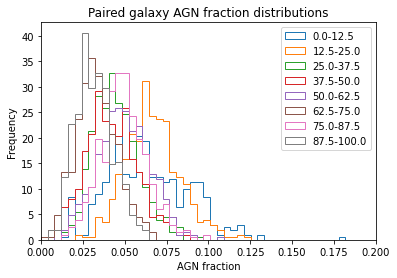

In [118]:
pAGNf_df.plot.hist(bins=45, histtype='step', density=True)
plt.xlim(0, 0.2)
plt.title('Paired galaxy AGN fraction distributions')
plt.xlabel('AGN fraction')
plt.show()

In [100]:
### should double check the movement of all this data

In [101]:
# make AGN fraction vectors
pdata = [pAGNf_df[col] for col in pAGNf_df]
idata = [iAGNf_df[col] for col in pAGNf_df]

# make position vector
kpc_meds = [ ( ( float((bins[key].split('-'))[0]) + float((bins[key].split('-'))[1]) ) / 2 ) for key in bins ]

# define violin plot width
vwidth = float((bins['0'].split('-'))[1]) - float((bins['0'].split('-'))[0])

# make an AGN enhancment vector
# quick way to get rid of dividing by 0 issue, will need to address later

for j in range(0,len(idata)):
    for k in range(0, len(idata[j])):
        if idata[j][k] == 0:
            idata[j][k] = 1000
            
for j in range(0,len(idata)):
    for k in range(0, len(idata[j])):
        if idata[j][k] == 1000:            
            idata[j][k] = min(idata[j])
            print('here')
        


AGN_enh = [(pdata[i] / idata[i]) for i in range(0, len(pdata))]

# should make some dynamic vector in case I want to increase pair sample out to 150 kpc or something

here
here
here
here


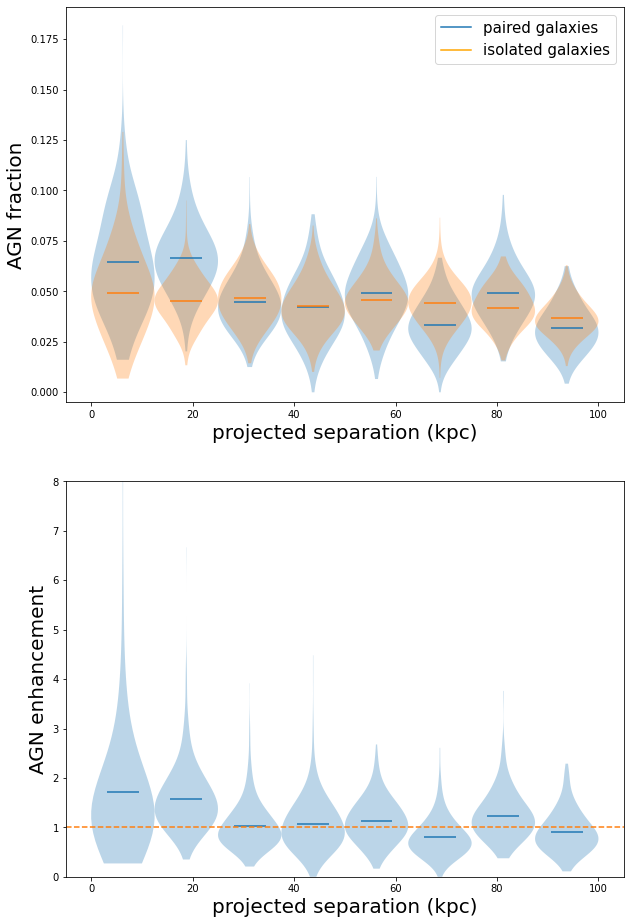

In [106]:
# make violin plots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 16))
axs[0].violinplot(pdata, kpc_meds, points=100, widths=vwidth, showmeans=True,
                     showextrema=False, showmedians=False, bw_method=0.5)
axs[0].violinplot(idata, kpc_meds, points=100, widths=vwidth, showmeans=True,
                     showextrema=False, showmedians=False, bw_method=0.5)
# axs[0].set_title('Results', fontsize=20)
axs[0].axis(xmin=-5,xmax=105)
axs[0].axis(ymin=-0.005)
axs[0].set_xlabel('projected separation (kpc)', fontsize=20)
axs[0].set_ylabel('AGN fraction', fontsize=20)
axs[0].plot([-10,-10], color='#1f77b4', label='paired galaxies')
axs[0].plot([-10,-10], color='orange', label='isolated galaxies')
axs[0].legend(fontsize=15)

axs[1].violinplot(AGN_enh, kpc_meds, points=100, widths=vwidth, showmeans=True,
                     showextrema=False, showmedians=False, bw_method=0.5)
axs[1].plot([-5,105], [1,1], linestyle='--')
axs[1].axis(xmin=-5,xmax=105)
axs[1].axis(ymin=0, ymax=8)
axs[1].set_xlabel('projected separation (kpc)', fontsize=20)
axs[1].set_ylabel('AGN enhancement', fontsize=20)

plt.show()



In [103]:
# show average out counts from the bins and output as a simple df
for rnge in bins:
    bin_AGN_count[str(bins[rnge])] = [np.mean(bin_AGN_count[str(bins[rnge])])]
    bin_gal_count[str(bins[rnge])] = [np.mean(bin_gal_count[str(bins[rnge])])]
# print(bin_gal_count)
AGN_count_df = pd.DataFrame.from_dict(bin_AGN_count)
gal_count_df = pd.DataFrame.from_dict(bin_gal_count)
df = pd.concat([AGN_count_df,gal_count_df], ignore_index = True, axis=0)
df

,0.0-12.5,12.5-25.0,25.0-37.5,37.5-50.0,50.0-62.5,62.5-75.0,75.0-87.5,87.5-100.0
0,3.776,9.168,6.866,6.124,8.684,6.384,9.864,7.118
1,58.988,138.088,153.380,145.232,175.972,191.856,200.484,224.376


In [107]:
it_df.loc[it_df['mass_ratio'] < 0.4]

,Unnamed: 0,prime_index,partner_index,arc_sep,mass_ratio,dv,kpc_sep,prime_drawn_z,prime_drawn_M,prime_drawn_LX,partner_drawn_z,partner_drawn_M,partner_drawn_LX,prime_control1_ID,prime_control1_drawn_z,prime_control1_drawn_M,prime_control1_drawn_LX,prime_control2_ID,prime_control2_drawn_z,prime_control2_drawn_M,prime_control2_drawn_LX,partner_control1_ID,partner_control1_drawn_z,partner_control1_drawn_M,partner_control1_drawn_LX,partner_control2_ID,partner_control2_drawn_z,partner_control2_drawn_M,partner_control2_drawn_LX,field,prime_cat_ID,partner_cat_ID,prime_control1_cat_ID,prime_control2_cat_ID,partner_control1_cat_ID,partner_control2_cat_ID
121,33983,1340,1318,2.008343,0.290000,903.361968,16.292172,1.0600,10.640000,-99.0,1.0500,10.350000,-99.0,17063.0,1.0600,10.680000,-99.0,10970.0,1.1000,10.630000,-99.0000,7749.0,1.07,10.350000,-99.0000,12190.0,1.0600,10.330000,-99.0000,GDS,1869,1839,25664.0,16474.0,11399.0,18326.0
195,57875,2196,2358,8.562811,0.010000,828.742772,70.430202,1.1400,10.760000,-99.0,1.1300,10.750000,-99.0,14494.0,1.1500,10.730000,-99.0,1387.0,1.1200,10.730000,-99.0000,12137.0,1.17,10.700000,41.4973,616.0,1.2000,10.770000,-99.0000,GDS,3085,3302,21872.0,1938.0,18243.0,834.0
201,59172,2243,2221,1.778457,0.030000,513.994885,13.786117,0.8847,10.550000,-99.0,0.8800,10.520000,-99.0,13258.0,0.9100,10.540000,-99.0,4513.0,0.8600,10.570000,-99.0000,10900.0,0.92,10.520000,-99.0000,6795.0,0.9000,10.480000,42.0586,GDS,3149,3117,19959.0,6532.0,16352.0,9955.0
202,59512,2253,2274,9.010820,0.010000,-619.997307,69.840130,0.8843,10.620000,-99.0,0.8900,10.610000,-99.0,5752.0,0.8453,10.610000,-99.0,10992.0,0.9200,10.600000,40.9546,12879.0,0.81,10.590000,41.5758,12924.0,0.9000,10.700000,-99.0000,GDS,3164,3193,8388.0,16514.0,19384.0,19443.0
204,60158,2274,2243,11.182751,0.060000,576.358874,86.837528,0.8900,10.610000,-99.0,0.8847,10.550000,-99.0,4528.0,0.8700,10.670000,-99.0,13780.0,0.9577,10.610000,-99.0000,15165.0,0.82,10.510000,42.7349,2583.0,0.9597,10.530000,-99.0000,GDS,3193,3149,6552.0,20800.0,22855.0,3623.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10109,600047,17376,16952,2.023356,0.013030,596.214220,17.101732,1.4600,10.307496,-99.0,1.4500,10.294466,-99.0,18409.0,1.4600,10.305351,-99.0,17962.0,1.4700,10.303196,-99.0000,11754.0,1.44,10.287802,43.6199,19236.0,1.4400,10.276462,-99.0000,UDS,24123,23493,25643.0,24998.0,16261.0,26804.0
10162,611881,17840,17759,10.378411,0.334597,-497.048381,84.188703,2.4400,10.559907,-99.0,2.4600,10.225309,-99.0,207.0,2.4500,10.531479,-99.0,2242.0,2.4700,10.549003,-99.0000,14350.0,2.51,10.232996,-99.0000,10080.0,2.4900,10.158362,-99.0000,UDS,24820,24705,348.0,3268.0,19853.0,13942.0
10242,639163,18669,18407,10.260319,0.207285,883.973344,83.551021,1.0800,10.481443,-99.0,1.0700,10.274158,-99.0,5383.0,1.0800,10.460898,-99.0,1735.0,1.0500,10.477121,-99.0000,18316.0,1.08,10.230449,-99.0000,13132.0,1.0600,10.225309,-99.0000,UDS,26028,25640,7598.0,2546.0,25518.0,18158.0
10283,650240,19016,19143,1.538478,0.090709,0.000000,13.032871,1.6000,10.053078,-99.0,1.6000,9.962369,-99.0,6379.0,1.6000,10.033424,-99.0,16860.0,1.5900,10.075547,-99.0000,6708.0,1.61,9.945469,-99.0000,4971.0,1.6200,9.955688,-99.0000,UDS,26515,26680,8924.0,23355.0,9371.0,7022.0


In [28]:
# right now there is not evidence for AGN enhancement
# a few things:
## write code to account for pairs where a partner falls below a mass limit
### simply just say that the prime needs to be greater that 8.5, and any partner needs to be within a mass ratio limit

## seal with duplicate issue where mass ratio = 0, currently some unaccounted for duplicates

## control sampe not exactly representative of the pair sample

## currently, we are using zhi and low values for the mFDa approach, which is not consistent with the draws
### additionally, these are 68% confidence intervals
### will be solved when Dale sends more data
#   - could try making the dz threshold lower
#   - why are the pairs at higher z than expected?
#   - could be the result of poor zhi / zlow cuts (could run one iteration to find out

## could be worth correcting all of the pd warnings now that I fully understand loc...
#   - thought I fixed this but nope

## galaxy duplicate issue in counting AGN -> should be fixed in this code ^
#   - okay but don't we want to not do this before making bin cuts? perhaps it is just safest to select the closest pair
#   - in binning the prime galaxy and include the partner galaxies where in their own bins?
#   - ask Chris what we should do


# let's say the current version of the code is version 1.0
# these tasts will be implemented as different versions


In [154]:
# major issue now is that ID's appear in both the pair and control samples
# could be due to missuse of loc and iloc
# incorrect definitions for pair_df or iso_df

## Create Composite Photo-Z PDF's

In [ ]:
# this will only work for photo-z draw only right now
# will need to include some kind of spec-z flag
fields = ['GDS','EGS','COS','GDN','UDS']

# will need to load all the redshift catalogs for this to normalize to the listed mean

In [110]:
# take a similar approach as plotting pair/control mass/z distributions but also sort into bins
# prime_cat_ID	partner_cat_ID	prime_control1_cat_ID	
# prime_control2_cat_ID	partner_control1_cat_ID	partner_control2_cat_ID

# create bins
max_dist = 100
n_bins = 8
bins, bin_pair_filenames, bin_control_filenames = make_bins_PDF(max_dist=max_dist, n_bins=n_bins)

# generate a 2 random integers to look at distributions
idx = random.randint(len(os.listdir(data_path+'photoz_results/')), size=1)

# load the random iteration
ran_df = pd.read_csv( data_path+'photoz_results/'+(os.listdir(data_path+'photoz_results/'))[file_idx] )
ran_df = ran_df[ (ran_df['prime_drawn_M'] > 10) ]#& (ran_df['field'] != 'GDS') ]
ran_df = ran_df.fillna('666666666')

# change field string names and ID so that the filenames can easily be created:
# do ID first... this was designed kinda poorly on my part...
ran_df.loc[ (((ran_df['prime_cat_ID'].astype(int)).astype(str)).str.len()) == 1, 
           'prime_cat_ID' ] = '0000'+(ran_df['prime_cat_ID'].astype(int)).astype(str)
ran_df.loc[ (((ran_df['prime_cat_ID'].astype(int)).astype(str)).str.len()) == 2, 
           'prime_cat_ID' ] = '000'+(ran_df['prime_cat_ID'].astype(int)).astype(str)
ran_df.loc[ (((ran_df['prime_cat_ID'].astype(int)).astype(str)).str.len()) == 3, 
           'prime_cat_ID' ] = '00'+(ran_df['prime_cat_ID'].astype(int)).astype(str)
ran_df.loc[ (((ran_df['prime_cat_ID'].astype(int)).astype(str)).str.len()) == 4, 
           'prime_cat_ID' ] = '0'+(ran_df['prime_cat_ID'].astype(int)).astype(str)
ran_df.loc[ (((ran_df['prime_cat_ID'].astype(int)).astype(str)).str.len()) == 5, 
           'prime_cat_ID' ] = (ran_df['prime_cat_ID'].astype(int)).astype(str)

ran_df.loc[ (((ran_df['partner_cat_ID'].astype(int)).astype(str)).str.len()) == 1, 
           'partner_cat_ID' ] = '0000'+(ran_df['partner_cat_ID'].astype(int)).astype(str)
ran_df.loc[ (((ran_df['partner_cat_ID'].astype(int)).astype(str)).str.len()) == 2, 
           'partner_cat_ID' ] = '000'+(ran_df['partner_cat_ID'].astype(int)).astype(str)
ran_df.loc[ (((ran_df['partner_cat_ID'].astype(int)).astype(str)).str.len()) == 3, 
           'partner_cat_ID' ] = '00'+(ran_df['partner_cat_ID'].astype(int)).astype(str)
ran_df.loc[ (((ran_df['partner_cat_ID'].astype(int)).astype(str)).str.len()) == 4, 
           'partner_cat_ID' ] = '0'+(ran_df['partner_cat_ID'].astype(int)).astype(str)
ran_df.loc[ (((ran_df['partner_cat_ID'].astype(int)).astype(str)).str.len()) == 5, 
           'partner_cat_ID' ] = (ran_df['partner_cat_ID'].astype(int)).astype(str)

ran_df.loc[ (pd.isna(ran_df['prime_control1_cat_ID']) == False) & ((((ran_df['prime_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 1), 
           'prime_control1_cat_ID' ] = '0000'+(ran_df['prime_control1_cat_ID'].astype(int)).astype(str)
ran_df.loc[ ((((ran_df['prime_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 2), 
           'prime_control1_cat_ID' ] = '000'+(ran_df['prime_control1_cat_ID'].astype(int)).astype(str)
ran_df.loc[ ((((ran_df['prime_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 3), 
           'prime_control1_cat_ID' ] = '00'+(ran_df['prime_control1_cat_ID'].astype(int)).astype(str)
ran_df.loc[ ((((ran_df['prime_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 4), 
           'prime_control1_cat_ID' ] = '0'+(ran_df['prime_control1_cat_ID'].astype(int)).astype(str)
ran_df.loc[ ((((ran_df['prime_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 5), 
           'prime_control1_cat_ID' ] = (ran_df['prime_control1_cat_ID'].astype(int)).astype(str)

ran_df.loc[ ((((ran_df['prime_control2_cat_ID'].astype(int)).astype(str)).str.len()) == 1), 
           'prime_control2_cat_ID' ] = '0000'+(ran_df['prime_control2_cat_ID'].astype(int)).astype(str)
ran_df.loc[ ((((ran_df['prime_control2_cat_ID'].astype(int)).astype(str)).str.len()) == 2), 
           'prime_control2_cat_ID' ] = '000'+(ran_df['prime_control2_cat_ID'].astype(int)).astype(str)
ran_df.loc[ ((((ran_df['prime_control2_cat_ID'].astype(int)).astype(str)).str.len()) == 3), 
           'prime_control2_cat_ID' ] = '00'+(ran_df['prime_control2_cat_ID'].astype(int)).astype(str)
ran_df.loc[ ((((ran_df['prime_control2_cat_ID'].astype(int)).astype(str)).str.len()) == 4), 
           'prime_control2_cat_ID' ] = '0'+(ran_df['prime_control2_cat_ID'].astype(int)).astype(str)
ran_df.loc[ ((((ran_df['prime_control2_cat_ID'].astype(int)).astype(str)).str.len()) == 5), 
           'prime_control2_cat_ID' ] = (ran_df['prime_control2_cat_ID'].astype(int)).astype(str)

ran_df.loc[ ((((ran_df['partner_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 1), 
           'partner_control1_cat_ID' ] = '0000'+(ran_df['partner_control1_cat_ID'].astype(int)).astype(str)
ran_df.loc[ ((((ran_df['partner_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 2), 
           'partner_control1_cat_ID' ] = '000'+(ran_df['partner_control1_cat_ID'].astype(int)).astype(str)
ran_df.loc[ ((((ran_df['partner_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 3), 
           'partner_control1_cat_ID' ] = '00'+(ran_df['partner_control1_cat_ID'].astype(int)).astype(str)
ran_df.loc[ ((((ran_df['partner_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 4), 
           'partner_control1_cat_ID' ] = '0'+(ran_df['partner_control1_cat_ID'].astype(int)).astype(str)
ran_df.loc[ ((((ran_df['partner_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 5), 
           'partner_control1_cat_ID' ] = (ran_df['partner_control1_cat_ID'].astype(int)).astype(str)

ran_df.loc[ ((((ran_df['partner_control2_cat_ID'].astype(int)).astype(str)).str.len()) == 1), 
           'partner_control2_cat_ID' ] = '0000'+(ran_df['partner_control2_cat_ID'].astype(int)).astype(str)
ran_df.loc[ ((((ran_df['partner_control2_cat_ID'].astype(int)).astype(str)).str.len()) == 2), 
           'partner_control2_cat_ID' ] = '000'+(ran_df['partner_control2_cat_ID'].astype(int)).astype(str)
ran_df.loc[ ((((ran_df['partner_control2_cat_ID'].astype(int)).astype(str)).str.len()) == 3), 
           'partner_control2_cat_ID' ] = '00'+(ran_df['partner_control2_cat_ID'].astype(int)).astype(str)
ran_df.loc[ ((((ran_df['partner_control2_cat_ID'].astype(int)).astype(str)).str.len()) == 4), 
           'partner_control2_cat_ID' ] = '0'+(ran_df['partner_control2_cat_ID'].astype(int)).astype(str)
ran_df.loc[ ((((ran_df['partner_control2_cat_ID'].astype(int)).astype(str)).str.len()) == 5), 
           'partner_control2_cat_ID' ] = (ran_df['partner_control2_cat_ID'].astype(int)).astype(str)


# # now simply the field names
ran_df.loc[ (ran_df['field'] == 'GDS'), 'field' ] = 'GOODSS'
ran_df.loc[ (ran_df['field'] == 'COS'), 'field' ] = 'COSMOS'
ran_df.loc[ (ran_df['field'] == 'GDN'), 'field' ] = 'GOODSN'


ran_df['PR_PDF_filename'] = 'ALL_OPTIMIZED_PDFS_'+ran_df['field']+'_ID'+ran_df['prime_cat_ID']+'.pzd'
ran_df['PA_PDF_filename'] = 'ALL_OPTIMIZED_PDFS_'+ran_df['field']+'_ID'+ran_df['partner_cat_ID']+'.pzd'
ran_df['PRC1_PDF_filename'] = 'ALL_OPTIMIZED_PDFS_'+ran_df['field']+'_ID'+ran_df['prime_control1_cat_ID']+'.pzd'
ran_df['PRC2_PDF_filename'] = 'ALL_OPTIMIZED_PDFS_'+ran_df['field']+'_ID'+ran_df['prime_control2_cat_ID']+'.pzd'
ran_df['PAC1_PDF_filename'] = 'ALL_OPTIMIZED_PDFS_'+ran_df['field']+'_ID'+ran_df['partner_control1_cat_ID']+'.pzd'
ran_df['PAC2_PDF_filename'] = 'ALL_OPTIMIZED_PDFS_'+ran_df['field']+'_ID'+ran_df['partner_control2_cat_ID']+'.pzd'


# create a dictionary to store the CANDELS ID + field as the PDF filenames
bin_pair = {}
bin_control = {}

# separate pairs into bins
for rnge in bins:
    # get bin ranges from bins dictionary entries
    info = bins[rnge].split('-')
    low = float(info[0])
    high = float(info[1])

    # sort into bins
    bin_df = ran_df[ (ran_df['kpc_sep'] > low) & (ran_df['kpc_sep'] <= high) ]
    
    # create lists of the filenames for each bin and drop nan names
    PR_file = np.array(bin_df['PR_PDF_filename'])
    PA_file = np.array(bin_df['PA_PDF_filename'])
    PRC1_file = np.array(bin_df['PRC1_PDF_filename'])
    PRC2_file = np.array(bin_df['PRC2_PDF_filename'])
    PAC1_file = np.array(bin_df['PAC1_PDF_filename'])
    PAC2_file = np.array(bin_df['PAC2_PDF_filename'])
    pairs_file_all = np.concatenate((PR_file, PA_file), axis=0)
    control_file_all = np.concatenate((PRC1_file, PRC2_file, PAC1_file, PAC2_file), axis=0)
    
    control_file_all[np.where(control_file_all == 'ALL_OPTIMIZED_PDFS_UDS_ID666666666.pzd')] = np.nan
    control_file_all[np.where(control_file_all == 'ALL_OPTIMIZED_PDFS_UDS_ID666666666.pzd')] = np.nan
    control_file_all[np.where(control_file_all == 'ALL_OPTIMIZED_PDFS_UDS_ID666666666.pzd')] = np.nan
    control_file_all[np.where(control_file_all == 'ALL_OPTIMIZED_PDFS_UDS_ID666666666.pzd')] = np.nan
    control_file_all[np.where(control_file_all == 'ALL_OPTIMIZED_PDFS_UDS_ID666666666.pzd')] = np.nan

    cleaned_control = [x for x in control_file_all if str(x) != 'nan']
        
    bin_pair[bins[rnge]] = pairs_file_all
    bin_control[bins[rnge]] = cleaned_control
    
    
    
# ---------------------------------------------------------------------------------------------------

# # open each dataframe and plot distributions
    
#     # make subplots to show mass and z distributions for pair and control galaxies
#     fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
#     axs[0].hist(histp_z, bins=50, density=True, histtype='step')
#     axs[0].hist(histc_z, bins=50, density=True, histtype='step')
#     axs[0].set_xlabel('z')
#     axs[0].set_ylabel('density')
#     #axs[0].title['redshift']
    
#     axs[1].hist(histp_M, bins=50, density=True, histtype='step', label='pair')
#     axs[1].hist(histc_M, bins=50, density=True, histtype='step', label='control')
#     axs[1].legend()
#     axs[1].set_xlabel('stellar mass')
#     axs[1].set_ylabel('density')
    
#     fig.suptitle('Iteration {}'.format(file_idx), fontsize=20)
    
#     #axs[1].title('iteration '+str(file_idx))
#     plt.show()
    
#     print( np.median(histp_z), np.nanmedian(histc_z) )

In [105]:
# Okay I have the pair and control filenames in each bin, so now I'll just have to load them and overplot
# load in the redshift catalogs for each field]
zPATH = '/nobackup/c1029594/CANDELS_AGN_merger_data/Pair Project - Updated Data/redshift_catalogs.full/'

GDSz_cat = pd.read_csv(zPATH+'zcat_GOODSS_v2.0.cat', comment='#', names=['file','ID','RA','DEC','z_best',
                    'z_best_type','z_spec','z_spec_ref','z_grism','mFDa4_z_peak','mFDa4_z_weight','mFDa4_z683_low',
                    'mFDa4_z683_high','mFDa4_z954_low','mFDa4_z954_high','HB4_z_peak','HB4_z_weight','HB4_z683_low',
                    'HB4_z683_high','HB4_z954_low','HB4_z954_high','Finkelstein_z_peak','Finkelstein_z_weight',
                    'Finkelstein_z683_low','Finkelstein_z683_high','Finkelstein_z954_low','Finkelstein_z954_high',
                    'Fontana_z_peak','Fontana_z_weight','Fontana_z683_low','Fontana_z683_high','Fontana_z954_low',
                    'Fontana_z954_high','Pforr_z_peak','Pforr_z_weight','Pforr_z683_low','Pforr_z683_high',
                    'Pforr_z954_low','Pforr_z954_high','Salvato_z_peak','Salvato_z_weight','Salvato_z683_low',
                    'Salvato_z683_high','Salvato_z954_low','Salvato_z954_high','Wiklind_z_peak','Wiklind_z_weight',
                    'Wiklind_z683_low','Wiklind_z683_high','Wiklind_z954_low','Wiklind_z954_high','Wuyts_z_peak',
                    'Wuyts_z_weight','Wuyts_z683_low','Wuyts_z683_high','Wuyts_z954_low','Wuyts_z954_high'],
                       delimiter=' ')
EGSz_cat = pd.read_csv(zPATH+'zcat_EGS_v2.0.cat', comment='#', names=['file','ID','RA','DEC','z_best',
                    'z_best_type','z_spec','z_spec_ref','z_grism','mFDa4_z_peak','mFDa4_z_weight','mFDa4_z683_low',
                    'mFDa4_z683_high','mFDa4_z954_low','mFDa4_z954_high','HB4_z_peak','HB4_z_weight','HB4_z683_low',
                    'HB4_z683_high','HB4_z954_low','HB4_z954_high','Finkelstein_z_peak','Finkelstein_z_weight',
                    'Finkelstein_z683_low','Finkelstein_z683_high','Finkelstein_z954_low','Finkelstein_z954_high',
                    'Fontana_z_peak','Fontana_z_weight','Fontana_z683_low','Fontana_z683_high','Fontana_z954_low',
                    'Fontana_z954_high','Pforr_z_peak','Pforr_z_weight','Pforr_z683_low','Pforr_z683_high',
                    'Pforr_z954_low','Pforr_z954_high','Salvato_z_peak','Salvato_z_weight','Salvato_z683_low',
                    'Salvato_z683_high','Salvato_z954_low','Salvato_z954_high','Wiklind_z_peak','Wiklind_z_weight',
                    'Wiklind_z683_low','Wiklind_z683_high','Wiklind_z954_low','Wiklind_z954_high','Wuyts_z_peak',
                    'Wuyts_z_weight','Wuyts_z683_low','Wuyts_z683_high','Wuyts_z954_low','Wuyts_z954_high'],
                       delimiter=' ')
COSz_cat = pd.read_csv(zPATH+'zcat_COSMOS_v2.0.cat', comment='#', names=['file','ID','RA','DEC','z_best',
                    'z_best_type','z_spec','z_spec_ref','z_grism','mFDa4_z_peak','mFDa4_z_weight','mFDa4_z683_low',
                    'mFDa4_z683_high','mFDa4_z954_low','mFDa4_z954_high','HB4_z_peak','HB4_z_weight','HB4_z683_low',
                    'HB4_z683_high','HB4_z954_low','HB4_z954_high','Finkelstein_z_peak','Finkelstein_z_weight',
                    'Finkelstein_z683_low','Finkelstein_z683_high','Finkelstein_z954_low','Finkelstein_z954_high',
                    'Fontana_z_peak','Fontana_z_weight','Fontana_z683_low','Fontana_z683_high','Fontana_z954_low',
                    'Fontana_z954_high','Pforr_z_peak','Pforr_z_weight','Pforr_z683_low','Pforr_z683_high',
                    'Pforr_z954_low','Pforr_z954_high','Salvato_z_peak','Salvato_z_weight','Salvato_z683_low',
                    'Salvato_z683_high','Salvato_z954_low','Salvato_z954_high','Wiklind_z_peak','Wiklind_z_weight',
                    'Wiklind_z683_low','Wiklind_z683_high','Wiklind_z954_low','Wiklind_z954_high','Wuyts_z_peak',
                    'Wuyts_z_weight','Wuyts_z683_low','Wuyts_z683_high','Wuyts_z954_low','Wuyts_z954_high'],
                       delimiter=' ')
GDNz_cat = pd.read_csv(zPATH+'zcat_GOODSN_v2.0.cat', comment='#', names=['file','ID','RA','DEC','z_best',
                    'z_best_type','z_spec','z_spec_ref','z_grism','mFDa4_z_peak','mFDa4_z_weight','mFDa4_z683_low',
                    'mFDa4_z683_high','mFDa4_z954_low','mFDa4_z954_high','HB4_z_peak','HB4_z_weight','HB4_z683_low',
                    'HB4_z683_high','HB4_z954_low','HB4_z954_high','Finkelstein_z_peak','Finkelstein_z_weight',
                    'Finkelstein_z683_low','Finkelstein_z683_high','Finkelstein_z954_low','Finkelstein_z954_high',
                    'Fontana_z_peak','Fontana_z_weight','Fontana_z683_low','Fontana_z683_high','Fontana_z954_low',
                    'Fontana_z954_high','Pforr_z_peak','Pforr_z_weight','Pforr_z683_low','Pforr_z683_high',
                    'Pforr_z954_low','Pforr_z954_high','Salvato_z_peak','Salvato_z_weight','Salvato_z683_low',
                    'Salvato_z683_high','Salvato_z954_low','Salvato_z954_high','Wiklind_z_peak','Wiklind_z_weight',
                    'Wiklind_z683_low','Wiklind_z683_high','Wiklind_z954_low','Wiklind_z954_high','Wuyts_z_peak',
                    'Wuyts_z_weight','Wuyts_z683_low','Wuyts_z683_high','Wuyts_z954_low','Wuyts_z954_high'],
                       delimiter=' ')
UDSz_cat = pd.read_csv(zPATH+'zcat_UDS_v2.0.cat', comment='#', names=['file','ID','RA','DEC','z_best',
                    'z_best_type','z_spec','z_spec_ref','z_grism','mFDa4_z_peak','mFDa4_z_weight','mFDa4_z683_low',
                    'mFDa4_z683_high','mFDa4_z954_low','mFDa4_z954_high','HB4_z_peak','HB4_z_weight','HB4_z683_low',
                    'HB4_z683_high','HB4_z954_low','HB4_z954_high','Finkelstein_z_peak','Finkelstein_z_weight',
                    'Finkelstein_z683_low','Finkelstein_z683_high','Finkelstein_z954_low','Finkelstein_z954_high',
                    'Fontana_z_peak','Fontana_z_weight','Fontana_z683_low','Fontana_z683_high','Fontana_z954_low',
                    'Fontana_z954_high','Pforr_z_peak','Pforr_z_weight','Pforr_z683_low','Pforr_z683_high',
                    'Pforr_z954_low','Pforr_z954_high','Salvato_z_peak','Salvato_z_weight','Salvato_z683_low',
                    'Salvato_z683_high','Salvato_z954_low','Salvato_z954_high','Wiklind_z_peak','Wiklind_z_weight',
                    'Wiklind_z683_low','Wiklind_z683_high','Wiklind_z954_low','Wiklind_z954_high','Wuyts_z_peak',
                    'Wuyts_z_weight','Wuyts_z683_low','Wuyts_z683_high','Wuyts_z954_low','Wuyts_z954_high'],
                       delimiter=' ')

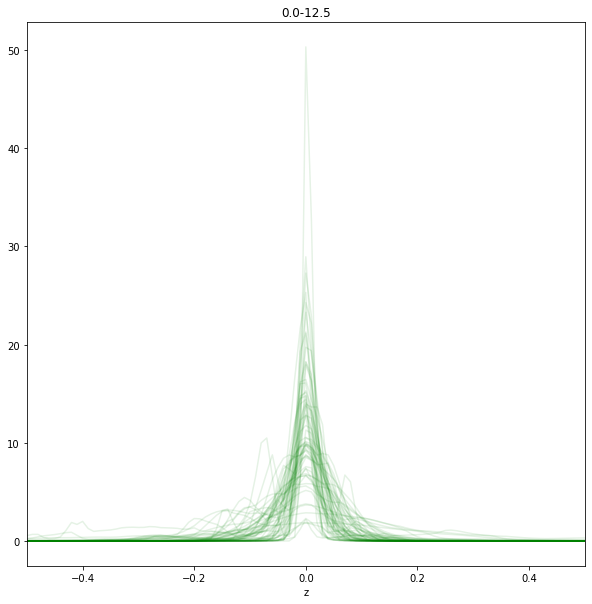

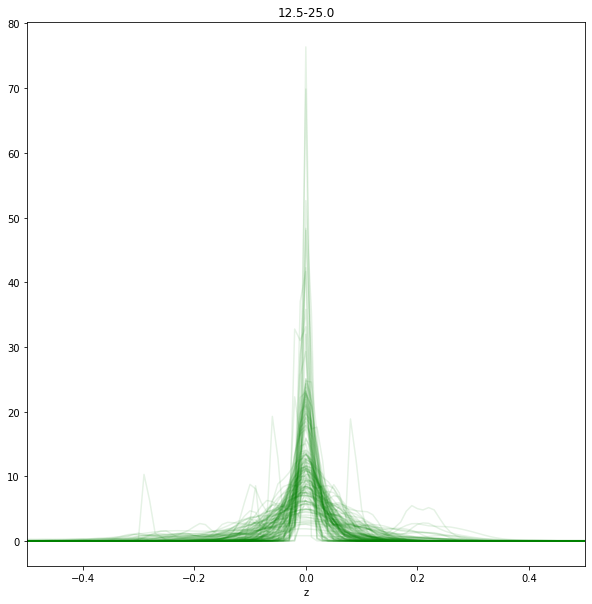

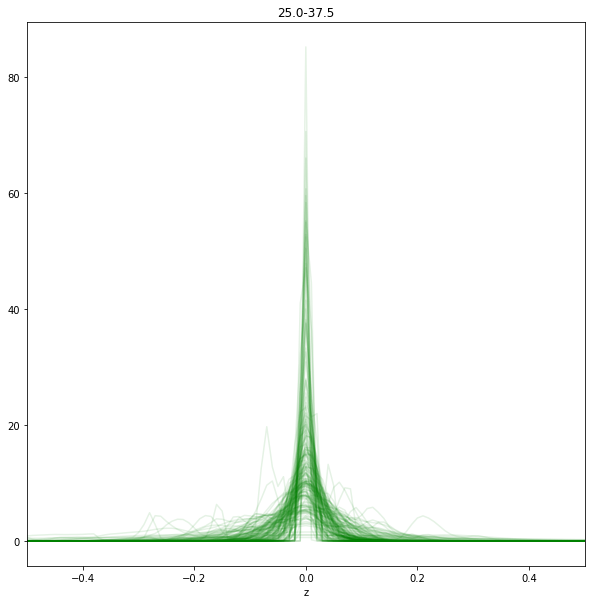

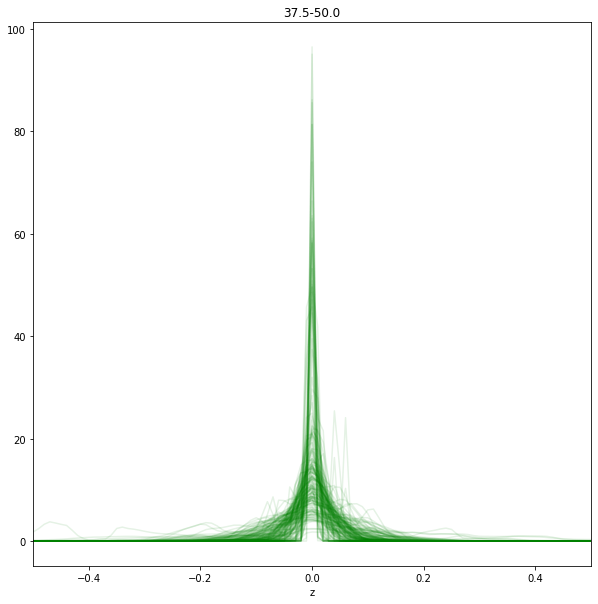

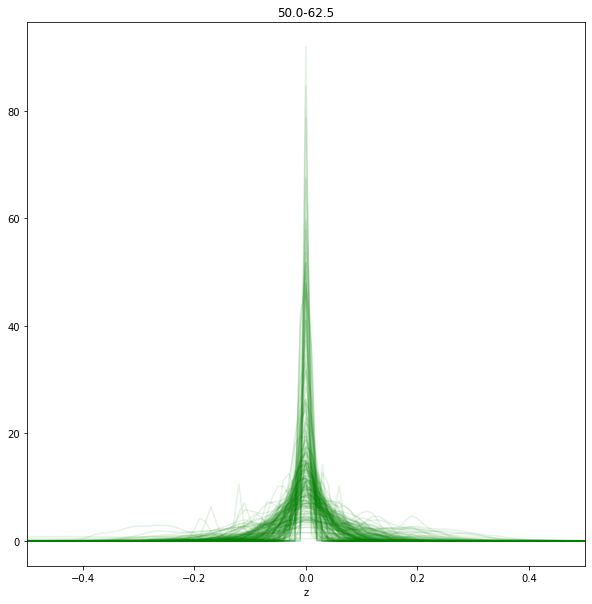

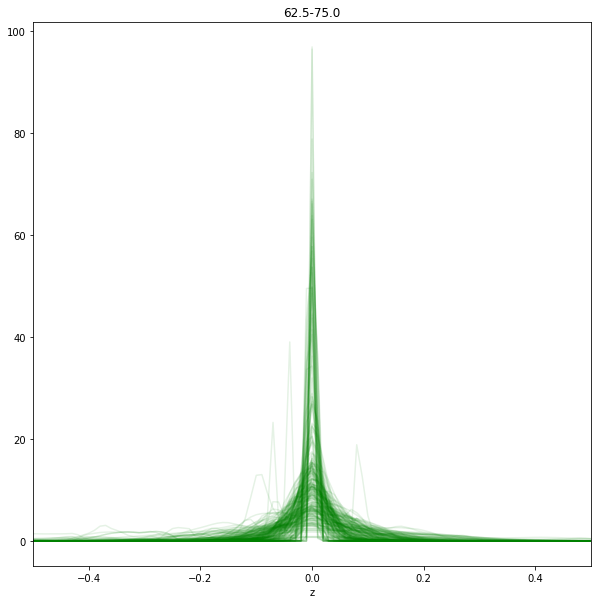

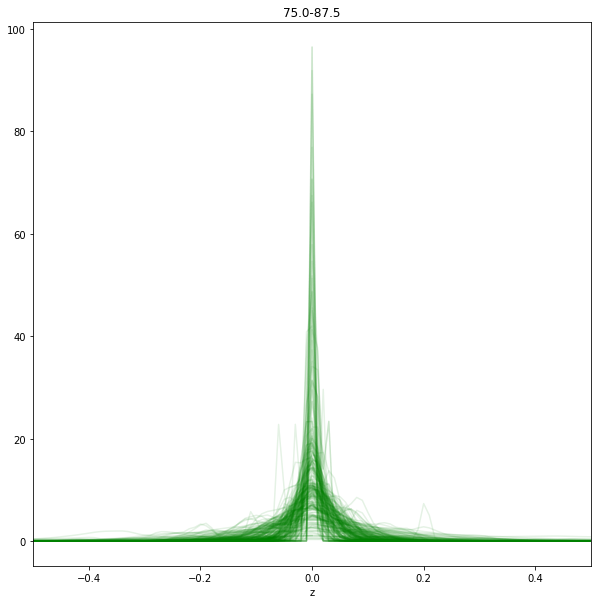

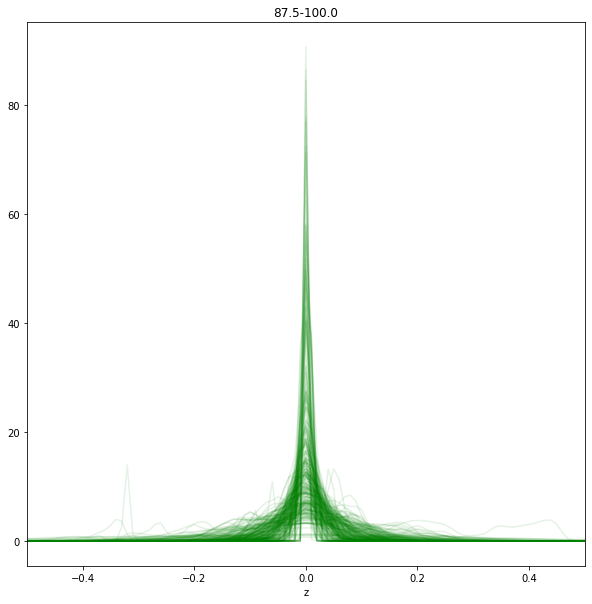

In [156]:
# overplot PDFs for pair sample
# recall the number of bins (n_bins) = 8
for key in bin_pair:
    fig = plt.figure(figsize=[10,10])
    plt.title(key)
    for file in bin_pair[key]:
        # identify fields based on filename and define z_peak
        file_field_end = file[-15:-12]
        if file_field_end == 'DSS': 
            file_field = 'GOODSS'
            z_peak = float(GDSz_cat.loc[ (GDSz_cat['file'] == file), 'HB4_z_peak' ])
        if file_field_end == 'EGS': 
            file_field = 'EGS'
            z_peak = float(EGSz_cat.loc[ (EGSz_cat['file'] == file), 'HB4_z_peak' ])
        if file_field_end == 'MOS': 
            file_field = 'COSMOS'
            z_peak = float(COSz_cat.loc[ (COSz_cat['file'] == file), 'HB4_z_peak' ])
        if file_field_end == 'DSN': 
            file_field = 'GOODSN'
            z_peak = float(GDNz_cat.loc[ (GDNz_cat['file'] == file), 'HB4_z_peak' ])
        if file_field_end == 'UDS': 
            file_field = 'UDS'
            z_peak = float(UDSz_cat.loc[ (UDSz_cat['file'] == file), 'HB4_z_peak' ])
        # open PDF for this file:
        pdf_filename = '/nobackup/c1029594/CANDELS_AGN_merger_data/Data - All Fields/'+file_field+'_OPTIMIZED03/'+file
        pdf = pd.read_csv(pdf_filename, comment='#', names=['z', 'Finkelstein', 'Fontana', 'Pforr', 'Salvato', 'Wiklind',
                                                  'Wuyts', 'HB4', 'mFDa4'], delimiter=' ')
        
        pdf['z'] = pdf['z'] - z_peak
        
        # subtract z_peak from all the z values in pdf
        plt.plot(pdf['z'], pdf['HB4'], color='g', alpha=0.1)    
        plt.xlim(-0.5,0.5)
        plt.xlabel('z')
    plt.show()
        
        
        
        

In [149]:
pdf

,z,Finkelstein,Fontana,Pforr,Salvato,Wiklind,Wuyts,HB4,mFDa4
0,-2.05,0.0,0.0,0.0,0.0,0.0,0.0,0.002943,0.0
1,-2.04,0.0,0.0,0.0,0.0,0.0,0.0,0.002943,0.0
2,-2.03,0.0,0.0,0.0,0.0,0.0,0.0,0.002943,0.0
3,-2.02,0.0,0.0,0.0,0.0,0.0,0.0,0.002943,0.0
4,-2.01,0.0,0.0,0.0,0.0,0.0,0.0,0.002943,0.0
...,...,...,...,...,...,...,...,...,...
996,7.91,0.0,0.0,0.0,0.0,0.0,0.0,0.002943,0.0
997,7.92,0.0,0.0,0.0,0.0,0.0,0.0,0.002943,0.0
998,7.93,0.0,0.0,0.0,0.0,0.0,0.0,0.002943,0.0
999,7.94,0.0,0.0,0.0,0.0,0.0,0.0,0.002943,0.0


In [84]:
# (len((ran_df['prime_cat_ID'].astype(int)).astype(str))) == 1
# ran_df.loc[ (pd.isna(ran_df['prime_control1_cat_ID']) == False) & ((((ran_df['prime_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 1)]

# new idea is to turn every nan value in the DF to '666666666' okay let's rock
ran_df4 = ran_df.fillna(66666666)
ran_df

,Unnamed: 0,prime_index,partner_index,arc_sep,mass_ratio,dv,kpc_sep,prime_drawn_z,prime_drawn_M,prime_drawn_LX,partner_drawn_z,partner_drawn_M,partner_drawn_LX,prime_control1_ID,prime_control1_drawn_z,prime_control1_drawn_M,prime_control1_drawn_LX,prime_control2_ID,prime_control2_drawn_z,prime_control2_drawn_M,prime_control2_drawn_LX,partner_control1_ID,partner_control1_drawn_z,partner_control1_drawn_M,partner_control1_drawn_LX,partner_control2_ID,partner_control2_drawn_z,partner_control2_drawn_M,partner_control2_drawn_LX,field,prime_cat_ID,partner_cat_ID,prime_control1_cat_ID,prime_control2_cat_ID,partner_control1_cat_ID,partner_control2_cat_ID,PR_PDF_filename,PA_PDF_filename,PRC1_PDF_filename,PRC2_PDF_filename,PAC1_PDF_filename,PAC2_PDF_filename
0,371,26,33,8.168008,0.890000,855.820415,66.863729,1.11,10.130000,-99.0,1.10,9.240000,-99.0,2008,1.12,10.12,-99,11446,1.13,10.14,-99,5187,1.07,9.25,-99,11445,1.08,9.27,-99,GOODSS,00040,00050,02840,17245,07649,17244,GOODSS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_GOODSS_I...,GOODSS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_GOODSS_I...,GOODSS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_GOODSS_I...,GOODSS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_GOODSS_I...,GOODSS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_GOODSS_I...,GOODSS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_GOODSS_I...
1,898,54,40,6.933610,0.510000,-828.742772,56.942380,1.13,10.430000,-99.0,1.14,9.920000,-99.0,9677,1.14,10.42,41.506,16135,1.14,10.45,-99,7750,1.14,9.94,-99,2330,1.12,9.91,-99,GOODSS,00076,00058,14520,24427,11516,03295,GOODSS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_GOODSS_I...,GOODSS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_GOODSS_I...,GOODSS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_GOODSS_I...,GOODSS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_GOODSS_I...,GOODSS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_GOODSS_I...,GOODSS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_GOODSS_I...
21,4979,222,209,8.312244,0.270000,863.964871,68.295366,2.28,10.020000,-99.0,2.25,9.750000,-99.0,15019,2.26,9.99,-99,12656,2.26,10.05,-99,15238,2.25,9.72,-99,9702,2.28,9.73,-99,GOODSS,00287,00271,22797,19135,23119,14566,GOODSS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_GOODSS_I...,GOODSS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_GOODSS_I...,GOODSS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_GOODSS_I...,GOODSS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_GOODSS_I...,GOODSS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_GOODSS_I...,GOODSS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_GOODSS_I...
31,6723,283,239,4.051994,0.970000,-337.317150,33.776159,2.07,10.320000,-99.0,2.08,9.350000,-99.0,3991,2.07,10.33,-99,11774,2.07,10.29,-99,2684,2.07,9.37,-99,15386,2.08,9.32,-99,GOODSS,00366,00312,05792,17744,03791,23341,GOODSS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_GOODSS_I...,GOODSS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_GOODSS_I...,GOODSS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_GOODSS_I...,GOODSS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_GOODSS_I...,GOODSS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_GOODSS_I...,GOODSS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_GOODSS_I...
73,16047,656,605,10.676728,0.570000,657.134823,85.181552,2.63,10.180000,-99.0,2.60,9.610000,-99.0,5540,2.63,10.18,-99,6144,2.64,10.16,-99,666666666,666666666,666666666,666666666,666666666,666666666,666666666,666666666,GOODSS,00887,00822,08177,09098,666666666,666666666,GOODSS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_GOODSS_I...,GOODSS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_GOODSS_I...,GOODSS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_GOODSS_I...,GOODSS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_GOODSS_I...,GOODSS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_GOODSS_I...,GOODSS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_GOODSS_I...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10111,657064,19187,19142,3.331600,0.289502,943.690558,26.801883,1.02,10.931966,-99.0,1.01,10.642465,-99.0,14609,1.03,10.9025,43.469,17252,1.05,10.9528,-99,11660,1,10.6693,42.8141,13295,1.05,10.6609,-99,UDS,26717,26665,20239,23956,16165,18388,UDS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_UDS_ID26717...,UDS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_UDS_ID26665...,UDS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_UDS_ID20239...,UDS_OPTIMIZED03/ALL_OPTIMIZED_PDFS_UD

In [51]:
def make_bins_PDF(max_dist=100, n_bins=10):

    # modified version of make_bins that doesn't care about AGN fractions
    bin_pair_filenames = {}
    bin_control_filenames = {}

    # create bin sizes
    all_bins = {}
    for bn in range(0, n_bins):
        # define limits for each bin
        all_bins[str(bn)] = str((max_dist/n_bins)*bn)+'-'+str((max_dist/n_bins)+(max_dist/n_bins)*bn)
        # define empty lists to later append AGN fractions to
        bin_pair_filenames[all_bins[str(bn)]] = []
        bin_control_filenames[all_bins[str(bn)]] = []
    
    return all_bins, bin_pair_filenames, bin_control_filenames